<a href="https://colab.research.google.com/github/julioreis-dev/tutorial_pandas/blob/main/tratamento_e_limpeza_(exerc%C3%ADcio).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [3]:
dataset = pd.read_csv('sample_data/tempo.csv', sep=';')
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [4]:
dataset.shape

(14, 5)

In [18]:
#Explorando as variáveis categóricas
agrupado_ap = dataset.groupby(['Aparencia']).size()
agrupado_ap

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

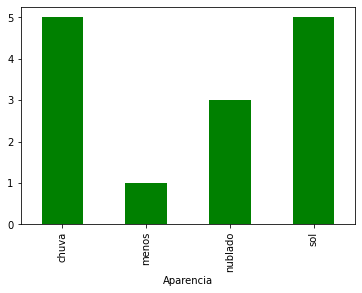

In [6]:
agrupado.plot.bar(color='Green')

In [7]:
agrupado_vento = dataset.groupby(['Vento']).size()
agrupado_vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

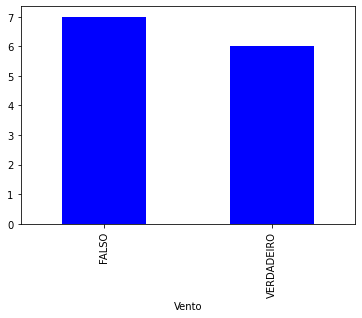

In [8]:
agrupado_vento.plot.bar(color='Blue')

In [14]:
dataset['Vento'].isnull().sum()

1

In [12]:
agrupado_jogar = dataset.groupby(['Jogar']).size()
agrupado_jogar

Jogar
nao    5
sim    9
dtype: int64

In [15]:
dataset['Jogar'].isnull().sum()

0

In [20]:
#Tratamento das variáveis categóricas
dataset.loc[dataset['Aparencia']=='menos', 'Aparencia']='sol'
agrupado_ap = dataset.groupby('Aparencia').size()
agrupado_ap

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [23]:
dataset['Aparencia'].isnull().sum()

0

In [22]:
dataset['Vento'].fillna('FALSO', inplace=True)
dataset['Vento'].isnull().sum()

0

In [24]:
agrupado_vento = dataset.groupby(['Vento']).size()
agrupado_vento

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

In [ ]:
#################################################################

In [ ]:
#Explorando as variáveis numéricas
agrupado_temp = dataset.groupby(['Temperatura']).size()
agrupado_temp

In [10]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [17]:
#Tratamento dos dados numéricos
dataset.loc[(dataset['Temperatura']<-130) | (dataset['Temperatura']>130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [25]:
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [26]:
dataset.loc[(dataset['Temperatura']<-130) | (dataset['Temperatura']>130), 'Temperatura']=mediana

In [27]:
dataset['Temperatura'].describe()

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Temperatura')

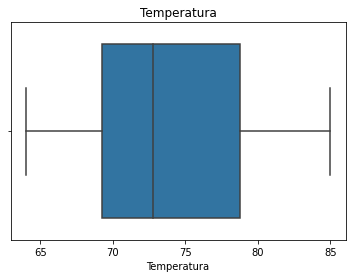

In [41]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

In [33]:
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [30]:
dataset.loc[(dataset['Umidade']>100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,FALSO,sim


In [32]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [34]:
dataset.loc[(dataset['Umidade']>100), 'Umidade']=mediana

In [35]:
dataset['Umidade'].describe()

count    13.000000
mean     80.961538
std       9.896257
min      65.000000
25%      70.000000
50%      85.000000
75%      90.000000
max      95.000000
Name: Umidade, dtype: float64

In [39]:
dataset['Umidade'].isnull().sum()

0

In [38]:
dataset['Umidade'].fillna(mediana, inplace=True)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Umidade')

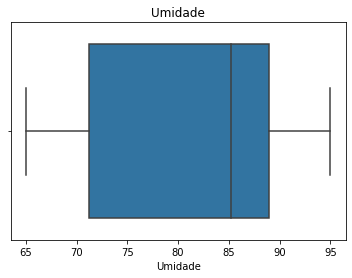

In [40]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')